# <font color="Red"> Credit EDA Case Study </font>

By

- S R Nikita Gulabi Kuchimanchi (niki.feb20@gmail.com)
- Pravalika Bende (sonybende97@gmail.com)

# Outlier Identification

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Setting column visibility

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',150)

## Task 1 : Data Sourcing

In [4]:
# Reading application_data.csv file
ApplicationData = pd.read_csv(r'F:\E anf F drives\F\Upgrad - DS PGD\Data Toolkit\Credit EDA Case Study\application_data.csv')

In [5]:
# Checking Data
ApplicationData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

## Task 2 : Data Cleaning

**Plotting boxplots for columns whose missing values>0 to identify outliers in them and take appropriate action**

In [6]:
# Defining a function to give box-plots for the columns passed as arguments
def plot_box(column):

    fig = plt.figure(figsize=[10,5])
    
    sns.boxplot(ApplicationData[column])
    plt.title('Box plot for the column: '+ column)
    
    plt.show()

In [7]:
# Listing out columns for missing value treatment - taken from Part-1
Box_plot_colns = [
'EXT_SOURCE_3',
'EXT_SOURCE_2',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'AMT_GOODS_PRICE']

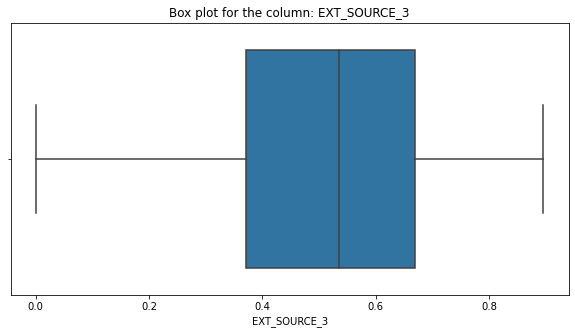

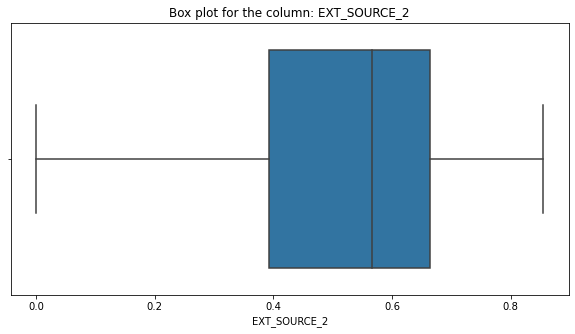

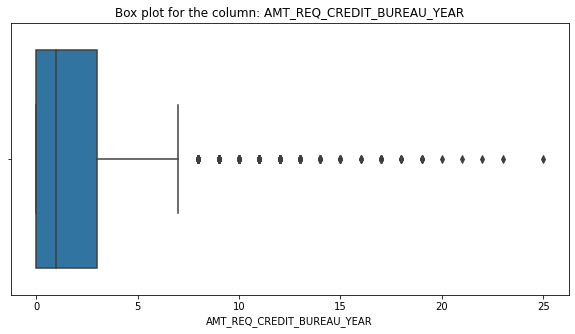

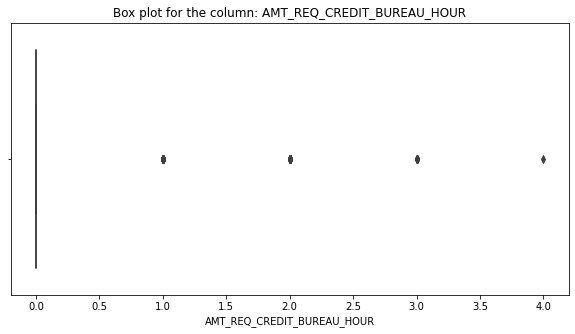

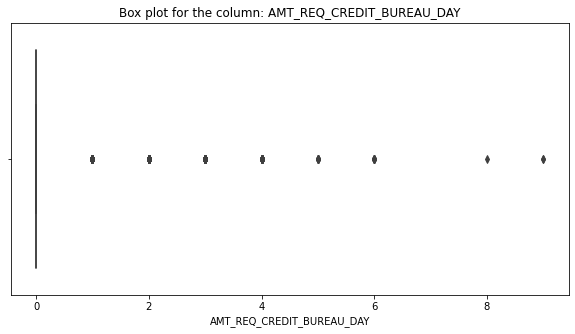

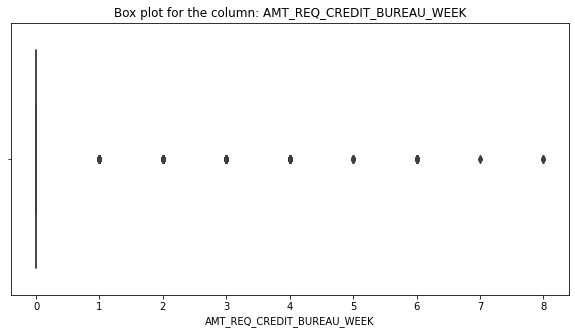

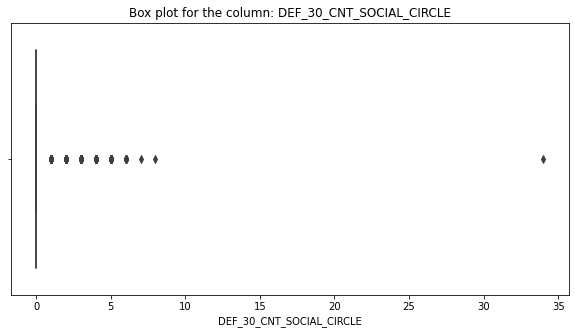

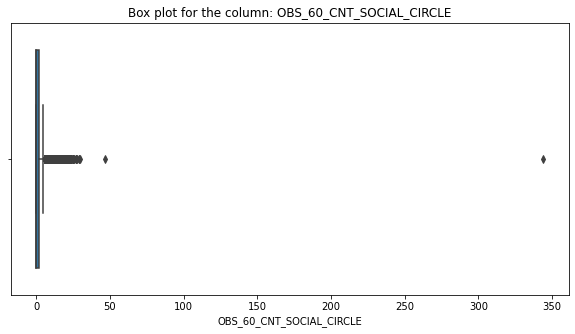

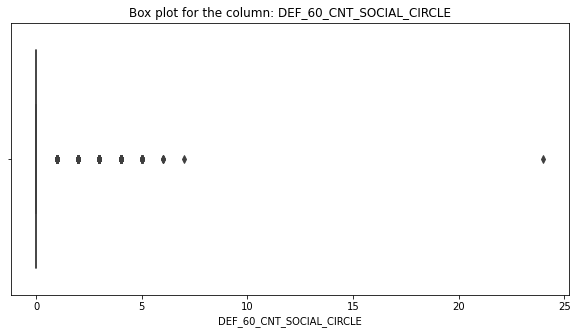

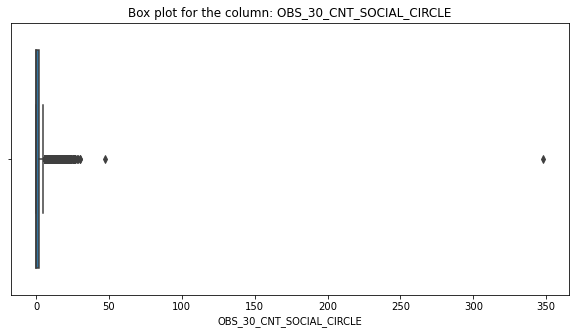

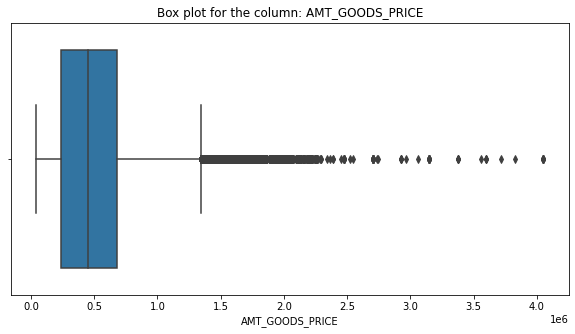

In [8]:
# Looping columns & pass them to function for box plots

for column in Box_plot_colns:
    plot_box(column)
    print("\n========================================================================================================\n")

**Insights :**

1. Only EXT_SOURCE_2 and EXT_SOURCE_3 are having continuous trend in data with no outliers. Hence, they can be substituted by **Mean**
2. Remaining all columns are either having discrete data or presence of outliers. Hence, those columns can be substituted by **Median**